# Introduction to Machine Learning

* Machine Learning refers to a number of different methods, but all have the goal of approximating a function.

### Goal 
* In this lesson we will build and fit a linear model to data as a simple example to get started and introduce some basic principles that we will use later for deep neural networks
    1. Make a dataset
    2. Create a model
    3. Fit the model


## DATA
   * Machine Learning models learn from examples which we will give to our model as a numpy arrays
   * In supervised learning we'll have input variables $x$ and target variables $y$ (also know as ground truth)
   * A data set will have pairs of input and output varibles in two arrays
       * x.shape==[examples , input data ]
       * y.shape==[examples , ground truth]   
   * We're going to try and fit a line which will have one input variable $x$ and the output $y$
       * $y=m*x+b$
   * **Note** This is an example we normally won't know the true equation to calculate y
       
### Generate a dataset       

(2000, 1)
(2000, 1)


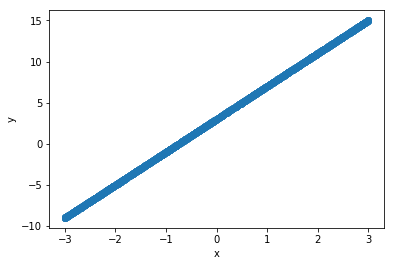

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x=np.random.uniform(-3,3,(2000,1)) #Generates 2,000 random numbers between -3,3 this is our input data

slope=4
intercept=3

y=slope*x+intercept

print(x.shape)
print(y.shape)
plt.scatter(x[:,0],y[:,0])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Give it a try

use the cell below to create a dataset call my_x and my_y that
* has 1,000 examples
* has a slope of -1
* has an intercept of 4

In [ ]:
"""your code here"""

In [ ]:
"""run this to check your answer"""
assert 'my_x' in locals(), "my_x dosen't exist did you get the name correct"
print('my_x initialized')
assert 'my_y' in locals(), "my_y dosen't exist did you get the name correct"
print('my_y initialized')

assert my_x.shape==(1000,1), "my_x has the wrong shape"
print('my_x has the correct shape')
assert my_y.shape==(1000,1), "my_y has the wrong shape"
print('my_y has the correct shape')
assert (my_x*-1+4==my_y).all(),  "slope or intercept wrong"
print("the data have the correct slope and intercept")

### Training, Development, Testing     
* We need to divide our examples into 3 groups            
    * Training/Development/Testing
    * Training: examples used to fit our models
    * Development: examples for checking for over-fitting during training and development 
    * Testing: Examples for evaluating our final model but **not for making any modeling decisions**
    
**note -** you will often see only 2-splits: training and testing. This can be okay, but fails in some cases.

In [ ]:
training=[]
development=[]
testing=[]
for i in range(len(x)):
    if np.random.uniform()>0.85:testing.append(i)
    elif np.random.uniform()>0.7:development.append(i)
    else: training.append(i)

x_test=x[testing]        
x_development=x[development]
x_train=x[training]

y_test=y[testing]        
y_development=y[development]
y_train=y[training]



## Model

Models can be anything from a simple linear model we'll use here to the most complicated deep-neural networks we're working toward. There are some commonalities
  * Models have parameters $\theta$ that control their output
  * Models are fit to data, normally by minimizing a **loss function ($L$)**
      * A Loss function ($L$) defines the goal of your model
  * Models also have hyper-parameters $H$ that determine their structure and how they fit to data

### Our simple model
* $y_{pred,i}=\theta_{1}*x_{i}+\theta_{2} $
* $L=\frac{1}{N}\sum_i (y_{pred,i}-y_{true,i})^2$
* **Goal**: Find $\theta_{1,2}$ that Minimizes $L$, or $min_\theta(L)$

Here $i$ represents each of our data points.

**Pro-Tip** Since we made our data set we already know what $\theta_{1}$ and $\theta_{2}$ should be (the slope and intercept), but it's almost always a good idea to try your model on data you understand before running it on new more complicated data. If you can't get it working with the data you know, there is no chance of getting it working with the data you don't.



In [ ]:
import importlib
import linearmodel
importlib.reload(linearmodel)


model=linearmodel.LinearModel()

print("Our initial unfit theta values:",model.theta())

y_pred=model.predict(x_train)

plt.scatter(x_train[:,0],y_pred[:,0],label='prediction')
plt.scatter(x_train[:,0],y_train[:,0],label='truth')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


print("With theta values of", model.theta(), "the loss is", model.loss(x_train,y_train)) 
model.settheta([2,3])
print("With theta values of", model.theta(), "the loss is", model.loss(x_train,y_train)) 



## Our Loss Function
Lets make a brute force plot of our loss function


In [ ]:
bins=10
plt_data=np.zeros((bins,bins))

for x_pixel,theta1 in enumerate(np.linspace(0,10,bins)):
    for y_pixel,theta2 in enumerate(np.linspace(0,10,bins)):
        model.settheta([theta1,theta2])
        plt_data[x_pixel][y_pixel]=model.loss(x_train,y_train)
        
        
  
        

In [ ]:
plt.imshow(plt_data,cmap='Blues',interpolation='bilinear')
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$")
plt.scatter([4],[3],marker='$X$',label='Minimum',color='r')
plt.legend()


## Excersise

Use the ```settheta()``` function, experiment with different values until you get a loss close to 10.

or  $min_{\theta}(L-10)^2$


In [ ]:
model.settheta([0,0])
print("This should equal zero:",(model.loss(x_train,y_train)-10)**2)

## Minimizing a loss function

How did you attempt the exercise above? If you did like me you might have done something like

* Try a number and see if the loss
* Try another number and see if the loss is closer to 10
    * If it is keep trying numbers in the same direction
    * If it isn't change directions 
* Keep trying numbers in the same direction until the loss passes 10
* Go back and try a number in-between the last two
* etc.

Machine learning algorithms work in a similar way

* Decide what the right direction to change the weights is to minimize the loss
    * It does this by calculating the **gradient**
* Take a step in that direction
    * How big a step? This is a **Hyper Parameter** called the **Learning Rate**
    

## Gradient
The gradient $\nabla_{\theta} L$ is a vector with one entry per parameter $\theta$ in your model, this vector points in the direction that increases the loss function. To minimize the loss function we want to take a step in the opposite direction.

$\theta_{new}=\theta_{current}-\alpha*\nabla_{\theta} L$

$\alpha$ controls how big a step along this vector.r


The gradient is calculated by taking the partial derivative of the loss function with respect to the parameters.
It can be done by hand in this case, but often this will be done for you by software package you are using.

In this case for our model

$L=\frac{1}{N}\sum_i (y_{pred,i}-y_{true,i})^2$

$L=\frac{1}{N}\sum_i ((\theta_{1}*x_{i}+\theta_{2})-y_{true,i})^2$

$dL/d\theta_1= \nabla_{\theta} L_{1}= 2*\frac{1}{N}\sum_i ((\theta_{1}*x_{i}+\theta_{2})-y_{true,i})*x_{i}$          
$dL/d\theta_2= \nabla_{\theta} L_{2}=2*\frac{1}{N}\sum_i ((\theta_{1}*x_{i}+\theta_{2})-y_{true,i})$         

## Learning Rate



Run the cell below - it will run the code below and perform **steps=100** optimization steps, starting from a random theta where each step is:
* Calculate: $\nabla_{\theta} L$
* Update: $\theta_{new}=\theta_{current}-\alpha*\nabla_{\theta} L$
* Repeat

and try different values of the learning rate lr ($\alpha$ above) with big steps i.e. {1e-4,1e-3,1e-2,1e-1,...}
You should see that too big a step can cause the optimization to fail, and too small a step can make the optimization take too long.

* How big a learning rate can you use before the code below fails?
* How small a learning rate does it take for the optimization to not reach the target in time?

In [ ]:
"This cell starts with random values of theta and optimizes our linear model"
lr=1e-2   #Jake, check the arrows with 1e-1

plt.rcParams["figure.figsize"] = (20,10)    #you can play with these values to make your plot bigger
                                            #but if you go off the page, it may "collapse" to be small again

plt.imshow(plt_data,cmap='Blues',interpolation='bilinear')


for i in range(10):
    model.settheta([np.random.uniform(0,8),np.random.uniform(0,8)])
    grads,path=model.optimize(x_train,y_train,lr,steps=100)
    x_points,y_points=zip(*path)
        
    plt.scatter(x_points,y_points,marker='$O$')
    plt.xlabel(r"$\theta_1$")
    plt.ylabel(r"$\theta_2$")
    
    ax=plt.gca()

    for (_x,_y),(_gx,_gy) in zip(path,grads):
        ngx= -1*_gx*lr
        ngy= -1*_gy*lr

        ax.annotate("", xy=(_x+ngx, _y+ngy), xytext=(_x, _y),
             arrowprops=dict(arrowstyle="->"))

       # plt.arrow(_x, _y, -1*ngx*lr, -1*ngy*lr)
plt.scatter([4],[3],marker='$X$',label='Target',color='r')
plt.legend()
plt.show()

# Stochastic  Gradient Descent 


Above when we calculate $\nabla_{\theta} L$ we have an equation that looks like this

$dL/d\theta_1= \nabla_{\theta} L_{1}= 2*\frac{1}{N}\sum_i ((\theta_{1}*x_{i}+\theta_{2})-y_{true,i})*x_{i}$          

However, the sum $\sum_i$ over every data point $i$ can become very expensive especially for large datasets. To get around this we use a technique called Stochastic Gradient Descent. We use the same technique before, but with only a subset of the data. So instead of all examples we use only 20 (for example). The number we use is a new hyper-parameter **Batch Size**.

**Batch Size** = Number of examples to use when calculating the gradient with Stochastic  Gradient Descent 





In [ ]:


"This cell starts with random values of theta and optimizes our linear model"
lr=1e-2   #Jake, check arrows
batch_size=1
plt.imshow(plt_data,cmap='Blues',interpolation='bilinear')


for i in range(10):
    model.settheta([np.random.uniform(0,8),np.random.uniform(0,8)])
    grads,path=model.optimize(x_train,y_train,lr,steps=100,batch_size=batch_size)
    x_points,y_points=zip(*path)
        
    plt.scatter(x_points,y_points,marker='$O$')
    plt.xlabel(r"$\theta_1$")
    plt.ylabel(r"$\theta_2$")
    
    ax=plt.gca()

    for (_x,_y),(_gx,_gy) in zip(path,grads):
        ngx= -1*_gx*lr
        ngy= -1*_gy*lr

        ax.annotate("", xy=(_x+ngx, _y+ngy), xytext=(_x, _y),
             arrowprops=dict(arrowstyle="->"))

       # plt.arrow(_x, _y, -1*ngx*lr, -1*ngy*lr)
plt.scatter([4],[3],marker='$X$',label='Target',color='r')
plt.legend()
plt.show()

You can see above with a batch size of 1, the path to the minimum wanders a bit more, but still converges. This is because each batch is a noisy estimate of the true loss function, and enough of them does a good job at approximating the complete loss

# Other optimizers
You maybe thinking "there must be a better way of optimizing without using a fixed learning rate ($\alpha$)!". You're in luck! There are many strategies for optimization that use varying step sizes, and have their own different set of hyper parameters. Some you'll see:

* Adam - A favorite of mine
* RMSProp
* Adagrad
* Adadelta

All use a similar strategy of stepping down a gradient, but how fast (or far) down the gradient is handled differently. 




### Conclusions

* We've introduced a few concepts
    * A model, which is a way of approximating a function from data
        * It has parameters $\theta$
        * It has hyper-parameters like
            * Learning Rates
            * Batch Sizes
    * Introduced how a model is fit to data
        * Gradient Descent
        *  Stochastic Gradient Descent
* Next lecture we will create our own model with a neural network, and train it to fit simple data

